In [13]:
# External dependencies
import os
import shutil
import numpy as np
from nvtabular.ops import *
from merlin.schema.tags import Tags

import nvtabular as nvt

from os import path

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
df_lib = get_lib()


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
!pip install merlin-models


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.9/418.9 kB 5.6 MB/s eta 0:00:00 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


  Created wheel for merlin-models: filename=merlin_models-23.6.0-py3-none-any.whl size=386073 sha256=9131847b4e2ca5ed9225246f91730aef3688e922fadb57c3dfd95bf73525e51c
  Stored in directory: /Users/rajathdb/Library/Caches/pip/wheels/9b/7f/83/44b6f42cde2fff7339924dfe733df5e63b3f5c7b49b17be6c9
Successfully built merlin-models


In [9]:
!pip install protobuf==3.19


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.19.0 which is incompatible.
googleapis-common-protos 1.59.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.19.0 which is incompatible.


In [12]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [2]:
# External dependencies
import os

from merlin.core.utils import download_file

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
df_lib = get_lib()

In [7]:
INPUT_DATA_DIR = os.environ.get(
    "INPUT_DATA_DIR", os.path.expanduser("nvtabular/movielens/data/")
)

In [9]:
download_file(
    "http://files.grouplens.org/datasets/movielens/ml-25m.zip",
    os.path.join(INPUT_DATA_DIR, "ml-25m.zip"),
)

downloading ml-25m.zip: 262MB [02:01, 2.16MB/s]                                         
unzipping files: 100%|█████████████████████████████████| 8/8 [00:03<00:00,  2.11files/s]


In [10]:
movies = df_lib.read_csv(os.path.join(INPUT_DATA_DIR, "ml-25m/movies.csv"))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies["genres"] = movies["genres"].str.split("|")
movies = movies.drop("title", axis=1)
movies.head()

,movieId,genres
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,"[Adventure, Children, Fantasy]"
2,3,"[Comedy, Romance]"
3,4,"[Comedy, Drama, Romance]"
4,5,[Comedy]


In [12]:
movies.to_parquet(os.path.join(INPUT_DATA_DIR, "movies_converted.parquet"))


In [13]:
ratings = df_lib.read_csv(os.path.join(INPUT_DATA_DIR, "ml-25m", "ratings.csv"))
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [14]:
ratings = ratings.drop("timestamp", axis=1)

# shuffle the dataset
ratings = ratings.sample(len(ratings), replace=False)

# split the train_df as training and validation data sets.
num_valid = int(len(ratings) * 0.2)

train = ratings[:-num_valid]
valid = ratings[-num_valid:]

In [15]:
train.to_parquet(os.path.join(INPUT_DATA_DIR, "train.parquet"))
valid.to_parquet(os.path.join(INPUT_DATA_DIR, "valid.parquet"))

In [16]:
# External dependencies
import os
import shutil
import numpy as np
from nvtabular.ops import *
from merlin.schema.tags import Tags

import nvtabular as nvt

from os import path

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
df_lib = get_lib()

In [17]:
CATEGORICAL_COLUMNS = ["userId", "movieId"]
LABEL_COLUMNS = ["rating"]

In [18]:
userId = ["userId"] >> TagAsUserID()
movieId = ["movieId"] >> TagAsItemID()

joined = userId + movieId >> JoinExternal(movies, on=["movieId"])

/Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


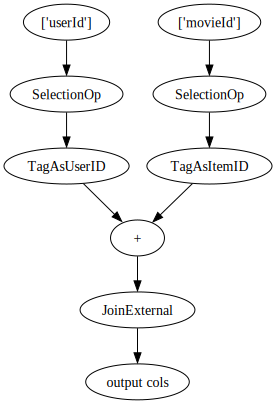

In [23]:
joined.graph


In [20]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.2 MB/s eta 0:00:00


In [22]:
!brew install graphviz


Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
cppinsights  pypy3.10     pypy3.9      python-toml  rio          scrapy
==> New Casks
drata-agent                picoscope                  score

You have 19 outdated formulae and 1 outdated cask installed.

==> Fetching dependencies for graphviz: freetype, imath, openexr, jpeg-xl, libavif, gd, jasper, netpbm, gts, libx11, gdk-pixbuf, librsvg, m4 and libtool
==> Fetching freetype
==> Downloading https://ghcr.io/v2/homebrew/core/freetype/manifests/2.13.1
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/freetype/blobs/sha256:87a44e9a3
######################################################################### 100.0%
==> Fetching imath
==> Downloading https://ghcr.io/v2/homebrew/core/imath/manifests/3.1.9
######################################################################### 1

==> Pouring jasper--4.0.0.arm64_ventura.bottle.tar.gz
🍺  /opt/homebrew/Cellar/jasper/4.0.0: 44 files, 1.6MB
==> Installing graphviz dependency: netpbm
==> Pouring netpbm--10.86.38_1.arm64_ventura.bottle.1.tar.gz
🍺  /opt/homebrew/Cellar/netpbm/10.86.38_1: 409 files, 18.5MB
==> Installing graphviz dependency: gts
==> Pouring gts--0.7.6_2.arm64_ventura.bottle.tar.gz
🍺  /opt/homebrew/Cellar/gts/0.7.6_2: 25 files, 1.5MB
==> Installing graphviz dependency: libx11
==> Pouring libx11--1.8.6.arm64_ventura.bottle.tar.gz
🍺  /opt/homebrew/Cellar/libx11/1.8.6: 1,054 files, 7MB
==> Installing graphviz dependency: gdk-pixbuf
==> Pouring gdk-pixbuf--2.42.10_1.arm64_ventura.bottle.tar.gz
==> /opt/homebrew/Cellar/gdk-pixbuf/2.42.10_1/bin/gdk-pixbuf-query-loaders --upd
🍺  /opt/homebrew/Cellar/gdk-pixbuf/2.42.10_1: 150 files, 3.9MB
==> Installing graphviz dependency: librsvg
==> Pouring librsvg--2.56.1.arm64_ventura.bottle.tar.gz
==> /opt/homebrew/opt/gdk-pixbuf/bin/gdk-pixbuf-query-loaders --update-cache

In [24]:
cat_features = joined >> Categorify()


In [25]:
ratings = nvt.ColumnGroup(["rating"]) >> LambdaOp(lambda col: (col > 3).astype("int8")) >> AddTags(Tags.TARGET)


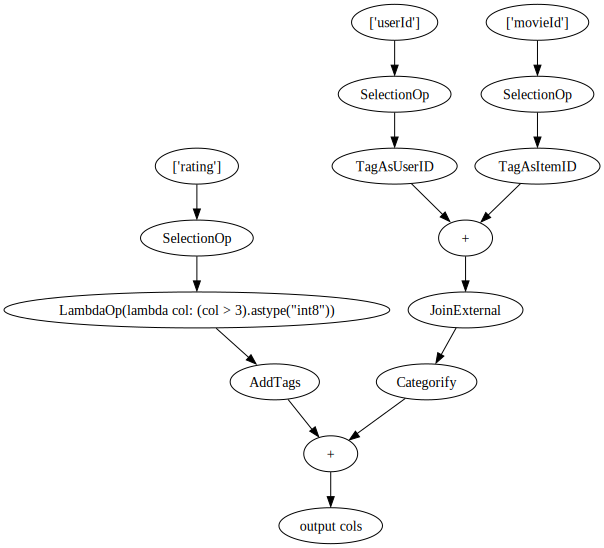

In [26]:
output = cat_features + ratings
(output).graph

In [27]:
workflow = nvt.Workflow(output)


In [28]:
dict_dtypes = {}

for col in CATEGORICAL_COLUMNS:
    dict_dtypes[col] = np.int64

for col in LABEL_COLUMNS:
    dict_dtypes[col] = np.float32

In [30]:
train_dataset = nvt.Dataset([os.path.join(INPUT_DATA_DIR, "train.parquet")])
valid_dataset = nvt.Dataset([os.path.join(INPUT_DATA_DIR, "valid.parquet")])

/Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [31]:
%%time
workflow.fit(train_dataset)

/Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/merlin/io/dataset.py:457: UserWarning: Changing an NVTabular Dataset to CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


CPU times: user 34 s, sys: 10.9 s, total: 44.8 s
Wall time: 47.9 s


In [32]:
# Make sure we have a clean output path
if path.exists(os.path.join(INPUT_DATA_DIR, "train")):
    shutil.rmtree(os.path.join(INPUT_DATA_DIR, "train"))
if path.exists(os.path.join(INPUT_DATA_DIR, "valid")):
    shutil.rmtree(os.path.join(INPUT_DATA_DIR, "valid"))

In [33]:
%time
workflow.transform(train_dataset).to_parquet(
    output_path=os.path.join(INPUT_DATA_DIR, "train"),
    shuffle=nvt.io.Shuffle.PER_PARTITION,
    cats=["userId", "movieId", "genres"],
    labels=["rating"],
    dtypes=dict_dtypes,
    write_hugectr_keyset=False  # only needed if using this ETL Notebook for training with HugeCTR
                               # should be removed otherwise to speed up computation
)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 14.1 µs


/Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [34]:
%time
workflow.transform(valid_dataset).to_parquet(
    output_path=os.path.join(INPUT_DATA_DIR, "valid"),
    shuffle=False,
    cats=["userId", "movieId", "genres"],
    labels=["rating"],
    dtypes=dict_dtypes,
    write_hugectr_keyset=True  # only needed if using this ETL Notebook for training with HugeCTR
                               # should be removed otherwise to speed up computation
)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 17.9 µs


/Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [35]:
workflow.save(os.path.join(INPUT_DATA_DIR, "workflow"))
workflow.output_schema

,name,tags,dtype,is_list,is_ragged,properties.num_buckets,properties.freq_threshold,properties.max_size,properties.cat_path,properties.domain.min,properties.domain.max,properties.domain.name,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.value_count.min,properties.value_count.max
0,userId,(Tags.CATEGORICAL),"DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,.//categories/unique.userId.parquet,0.0,162543.0,userId,162544.0,512.0,NaN,NaN
1,movieId,(Tags.CATEGORICAL),"DType(name='int64', element_type=<ElementType....",False,False,NaN,0.0,0.0,.//categories/unique.movieId.parquet,0.0,56639.0,movieId,56640.0,512.0,NaN,NaN
2,genres,(Tags.CATEGORICAL),"DType(name='int64', element_type=<ElementType....",True,True,NaN,0.0,0.0,.//categories/unique.genres.parquet,0.0,22.0,genres,23.0,16.0,0.0,NaN
3,rating,(Tags.TARGET),"DType(name='int8', element_type=<ElementType.I...",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
import glob

TRAIN_PATHS = sorted(glob.glob(os.path.join(INPUT_DATA_DIR, "train", "*.parquet")))
VALID_PATHS = sorted(glob.glob(os.path.join(INPUT_DATA_DIR, "valid", "*.parquet")))
TRAIN_PATHS, VALID_PATHS

(['nvtabular/movielens/data/train/part_0.parquet'],
 ['nvtabular/movielens/data/valid/part_0.parquet'])

In [37]:
df = df_lib.read_parquet(TRAIN_PATHS[0])
df.head()

,userId,movieId,genres,rating
0,434,5492,"[3, 6]",0.0
1,48824,1548,"[5, 4, 10]",1.0
2,36806,1729,"[4, 3]",0.0
3,40682,4625,"[4, 3, 8]",0.0
4,7569,1049,"[5, 7, 4, 8]",0.0


In [38]:
TRAIN_PATHS

['nvtabular/movielens/data/train/part_0.parquet']

In [3]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [4]:
from merlin.schema import Schema
from merlin.io import Dataset

train = Dataset(os.path.join(INPUT_DATA_DIR, "train/part_0.parquet"))
schema = train.schema

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [79]:
INPUT_DATA_DIR

'nvtabular/movielens/data/'

In [80]:
schema.column_names

['userId', 'movieId', 'genres', 'rating']

In [81]:
schema = schema.select_by_name(
   ['userId', 'movieId','genres']
)

In [82]:
schema

,name,tags,dtype,is_list,is_ragged,properties.num_buckets,properties.freq_threshold,properties.max_size,properties.cat_path,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,userId,(Tags.CATEGORICAL),"DType(name='int64', element_type=<ElementType....",False,False,None,0.0,0.0,.//categories/unique.userId.parquet,162544.0,512.0,0,162543,userId,NaN,NaN
1,movieId,(Tags.CATEGORICAL),"DType(name='int64', element_type=<ElementType....",False,False,None,0.0,0.0,.//categories/unique.movieId.parquet,56640.0,512.0,0,56639,movieId,NaN,NaN
2,genres,(Tags.CATEGORICAL),"DType(name='int64', element_type=<ElementType....",True,True,None,0.0,0.0,.//categories/unique.genres.parquet,23.0,16.0,0,22,genres,0.0,NaN


In [47]:
!pip install 'transformers4rec[pytorch,nvtabular]'

In [89]:
from transformers4rec import torch as tr


# Define input module to process tabular input-features and to prepare masked inputs
input_module = tr.TabularSequenceFeatures.from_schema(
    schema,
    aggregation="concat",
    d_output=256,
    masking="mlm",
)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2                                                                                             │
│    3                                                                                             │
│    4 # Define input module to process tabular input-features and to prepare masked inputs        │
│ ❱  5 input_module = tr.TabularSequenceFeatures.from_schema(                                      │
│    6 │   schema,                                                                                 │
│    7 │   aggregation="concat",                                                                   │
│    8 │   d_output=256,                                                                           │
│                                                                                                  │
│ /Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/transformers4rec/torch/features/s │
│ equence.py:194 in from_schema                                                                    │
│                                                                                                  │
│   191 │   │   TabularFeatures                                                                    │
│   192 │   │   │   Returns ``TabularFeatures`` from a dataset schema                              │
│   193 │   │   """                                                                                │
│ ❱ 194 │   │   output: TabularSequenceFeatures = super().from_schema(  # type: ignore             │
│   195 │   │   │   schema=schema,                                                                 │
│   196 │   │   │   continuous_tags=continuous_tags,                                               │
│   197 │   │   │   categorical_tags=categorical_tags,                                             │
│                                                                                                  │
│ /Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/transformers4rec/torch/features/t │
│ abular.py:179 in from_schema                                                                     │
│                                                                                                  │
│   176 │   │   │   │   │   schema, tags=continuous_tags, **kwargs                                 │
│   177 │   │   │   │   )                                                                          │
│   178 │   │   if categorical_tags:                                                               │
│ ❱ 179 │   │   │   maybe_categorical_module = cls.EMBEDDING_MODULE_CLASS.from_schema(             │
│   180 │   │   │   │   schema, tags=categorical_tags, **kwargs                                    │
│   181 │   │   │   )                                                                              │
│   182 │   │   if pretrained_embeddings_tags:                                                     │
│                                                                                                  │
│ /Users/rajathdb/miniconda3/envs/rl/lib/python3.8/site-packages/transformers4rec/torch/features/e │
│ mbedding.py:213 in from_schema                                                                   │
│                                                                                                  │
│   210 │   │                                                                                      │
│   211 │   │   if automatic_build and schema:                                                     │
│   212 │   │   │   output.build(                                                                  │
│ ❱ 213 │   │   │   │   get_output_sizes_from_schema(        

In [84]:
schema.select_by_tag(Tags.TARGET)


""


In [86]:
import torch

In [87]:
torch.Size([3, 4, 5])

torch.Size([3, 4, 5])